# Mixture model and EM algorithm 

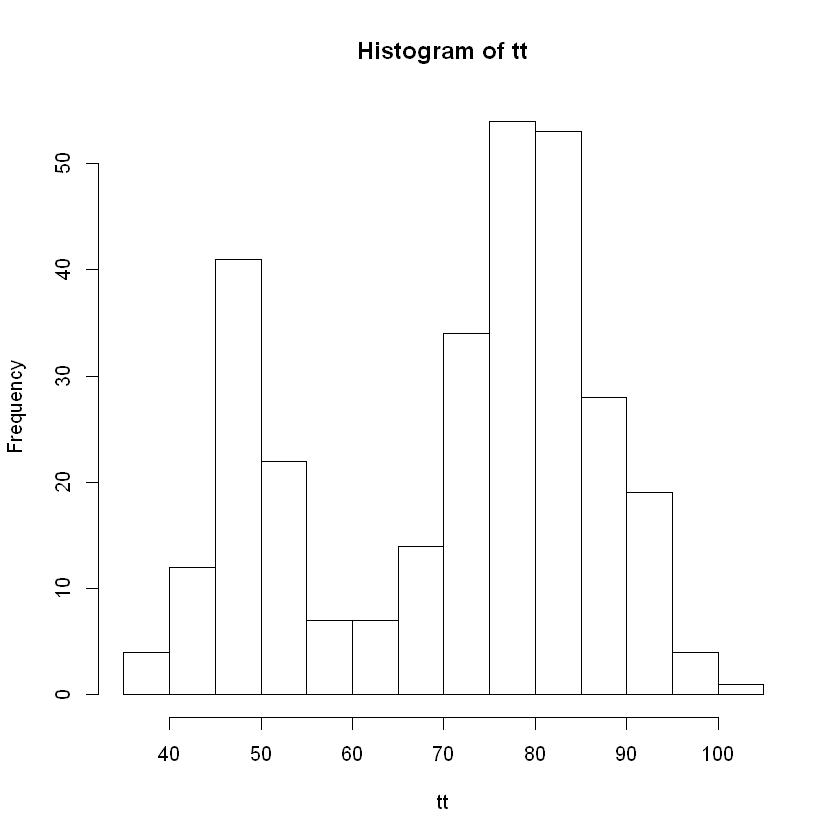

In [1]:
set.seed(1)
tt=c()
for(j in 1:300){
  k=runif(1)
  if(k<0.3){
    tt=append(tt,rnorm(1,50,5))
  }else{
    tt=append(tt,rnorm(1,80,8))
  }
}
hist(tt)

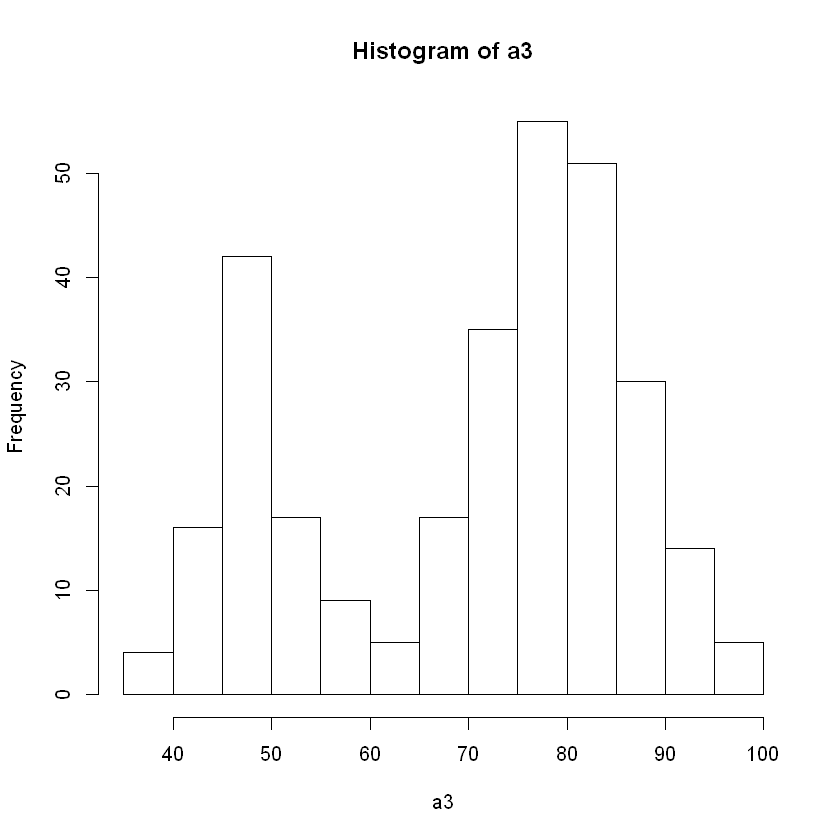

In [2]:
a3=round(tt) #assume the measured real data
hist(a3)

In [3]:
#2.EM
fi=0.4
u1=45
sigma1=4
u2=80
sigma2=7
dd=data.frame(u1=u1,u2=u2,sigma1=sigma1,sigma2=sigma2,fi=fi)
dd

for(i in 1:50){
  p1=fi*dnorm(a3,u1,sigma1)/(fi*dnorm(a3,u1,sigma1)+(1-fi)*dnorm(a3,u2,sigma2))
  p2=(1-fi)*dnorm(a3,u2,sigma2)/(fi*dnorm(a3,u1,sigma1)+(1-fi)*dnorm(a3,u2,sigma2))
  
  u1_new=sum(p1*a3)/sum(p1)
  u2_new=sum(p2*a3)/sum(p2)
  sigma1_new_square=sum(p1*(a3-u1_new)^2)/sum(p1)
  sigma2_new_square=sum(p2*(a3-u2_new)^2)/sum(p2)
  fi_new=sum(p1)/300
  
  cc=c(u1_new,u2_new,sqrt(sigma1_new_square),sqrt(sigma2_new_square),fi_new)
  dd=rbind(dd,cc)
  
  fi=fi_new
  u1=u1_new
  u2=u2_new
  sigma1=sqrt(sigma1_new_square)
  sigma2=sqrt(sigma2_new_square)
}

u1,u2,sigma1,sigma2,fi
45,80,4,7,0.4


In [9]:
dd[1:20,]

u1,u2,sigma1,sigma2,fi
45.00000,80.00000,4.000000,7.000000,0.4000000
48.09756,79.64945,4.491582,8.112340,0.2774092
48.29587,79.78289,4.693923,7.975066,0.2822187
48.40238,79.86974,4.792175,7.873494,0.2851549
48.46162,79.91702,4.847573,7.818136,0.2867666
48.49410,79.94219,4.878534,7.788921,0.2876335
48.51168,79.95556,4.895508,7.773496,0.2880972
48.52114,79.96267,4.904700,7.765322,0.2883448
48.52620,79.96645,4.909642,7.760979,0.2884769
48.52891,79.96847,4.912289,7.758667,0.2885474


real values
u1 : 50
u2 : 80
sigma1 : 5
sigma2 : 8
fi : 0.3